# Trip Advisor Hotel Reviews

## Abstract

Explore Hotel aspects and Predict the rating of each review.

## About this dataset

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.

With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!

In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Natural language processing (NLP)\\Sem Preparation\\tripadvisor_hotel_reviews\\tripadvisor_hotel_reviews.csv')
df.head()#first 5 records

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.tail()#last 5 records

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [5]:
df.shape #20491 records and 2 features

(20491, 2)

In [6]:
#for faster computation we are taking sample
df=df.sample(500)

In [7]:
df.info()#Summary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2271 to 12726
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  500 non-null    object
 1   Rating  500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.7+ KB


In [8]:
#1. Simple EDA

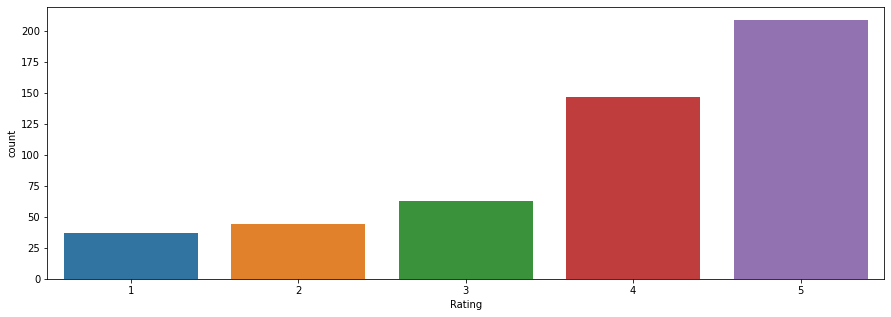

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(df['Rating'])
plt.show()

In [10]:
#Inferences: Most Ratings are in 4 and 5 star ratings for the reviews

In [11]:
#printing some reviews

In [12]:
#top 5 reviews
df['Review'][:5].values

array(["great older hotel husband took parents visit seattle couple days place nice, does n't look like outside great value location walking distance pretty space needle waterfront 8 blocks center downtown, older building ramada notch lobby inviting tastefully decorated, rooms simply furnished clean beds comfy, staff desk n't helpful, checked tired bit absent-minded mom left purse lobby set room key forgot way rooms, came lobby mintues later holding, probably used dealing weary travelers, informative city gave good recommendations restaurants, save small tear curtain parents room big deal stay perfect,  ",
       'honeymoon paradise im going step step accurate view hesitant come, let explain, im picky hard tempermental stomach, hard reach standards researched read reviews going, allow say exceeded expectations ways met dissapointed, let say complainers trip make, youre cranky home youll cranky paradise too.the airport like giant tiki hut open air come stairs straight little band playin

In [13]:
### Inferences :Observations from text:

#Most of the reviews are long and contain more that 5 sentences. 
#The reviews seems of the Trip Advisor Hotel about the amenties and experinces
#reviews are in English (from preliminary analysis)
#There is emphasis placed on certain words by capitalizing them. So, LOWERCASE CONVERSION will not be done FOR VADER MODEL. 
#There are certain emojis and characters which have to be removed. 
#There are also some reviews with major spelling errors. 
#spelling errors will not be handled now, but in the future, spelling correction will greatly help in reducing size of and making the vocabulary more effective and expressive.

In [14]:
#2. Data Cleaning

In [15]:
df1=df.copy()#making a copy of the original dataframe

In [16]:
df1.head()

,Review,Rating
2271,great older hotel husband took parents visit s...,4
18547,honeymoon paradise im going step step accurate...,5
4214,cambridge good reviews trip advisor users dead...,5
9566,"nice stay nice hotel good service, rooms ok. s...",4
15612,vg agree good reports hotel.i stayed family su...,5


In [17]:
#Step 1 : checking for null values

In [18]:
df1.isnull().sum()#overall dataset

Review    0
Rating    0
dtype: int64

In [19]:
#Step 2 : Converting To Lowercase and Replace

In [20]:
df1['Review_clean']=df1['Review'].str.replace('[^a-zA-Z\s]','')
df1['Review_clean'][:2].values

array(['great older hotel husband took parents visit seattle couple days place nice does nt look like outside great value location walking distance pretty space needle waterfront  blocks center downtown older building ramada notch lobby inviting tastefully decorated rooms simply furnished clean beds comfy staff desk nt helpful checked tired bit absentminded mom left purse lobby set room key forgot way rooms came lobby mintues later holding probably used dealing weary travelers informative city gave good recommendations restaurants save small tear curtain parents room big deal stay perfect  ',
       'honeymoon paradise im going step step accurate view hesitant come let explain im picky hard tempermental stomach hard reach standards researched read reviews going allow say exceeded expectations ways met dissapointed let say complainers trip make youre cranky home youll cranky paradise toothe airport like giant tiki hut open air come stairs straight little band playing baggage immediate b

In [21]:
#Step 3 : Tokenization

In [22]:
df1['Review_clean']=df1['Review_clean'].str.split(' ')
df1['Review_clean'].head()

2271     [great, older, hotel, husband, took, parents, ...
18547    [honeymoon, paradise, im, going, step, step, a...
4214     [cambridge, good, reviews, trip, advisor, user...
9566     [nice, stay, nice, hotel, good, service, rooms...
15612    [vg, agree, good, reports, hoteli, stayed, fam...
Name: Review_clean, dtype: object

In [23]:
#Step 3 : Remove Stopwords

In [24]:
import nltk
from nltk.corpus import stopwords

In [25]:
common_stopwords=stopwords.words('english')
print(common_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
def drop_common_stopwords(text):
    return[word for word in text if word not in common_stopwords]

In [27]:
df1['Review_clean']=df1['Review_clean'].apply(drop_common_stopwords)
df1['Review_clean'].head()

2271     [great, older, hotel, husband, took, parents, ...
18547    [honeymoon, paradise, im, going, step, step, a...
4214     [cambridge, good, reviews, trip, advisor, user...
9566     [nice, stay, nice, hotel, good, service, rooms...
15612    [vg, agree, good, reports, hoteli, stayed, fam...
Name: Review_clean, dtype: object

In [28]:
#Step 4 : Lemmetization

In [29]:
from nltk.stem.wordnet import WordNetLemmatizer
Lemmatizer=WordNetLemmatizer()

In [30]:
def Lemmetization(text):
    return[Lemmatizer.lemmatize(word) for word in text]

In [31]:
df1['Review_clean']=df1['Review_clean'].apply(Lemmetization)
df1['Review_clean'].head()

2271     [great, older, hotel, husband, took, parent, v...
18547    [honeymoon, paradise, im, going, step, step, a...
4214     [cambridge, good, review, trip, advisor, user,...
9566     [nice, stay, nice, hotel, good, service, room,...
15612    [vg, agree, good, report, hoteli, stayed, fami...
Name: Review_clean, dtype: object

In [32]:
#Step 5 : Cleaning the text

In [33]:
df1['Review_clean']=df1['Review_clean'].apply(lambda x:' '.join(x))
df1['Review_clean'].head()

2271     great older hotel husband took parent visit se...
18547    honeymoon paradise im going step step accurate...
4214     cambridge good review trip advisor user dead h...
9566     nice stay nice hotel good service room ok show...
15612    vg agree good report hoteli stayed family supe...
Name: Review_clean, dtype: object

In [34]:
#Word Cloud For Review_clean column

In [35]:
from wordcloud import WordCloud 

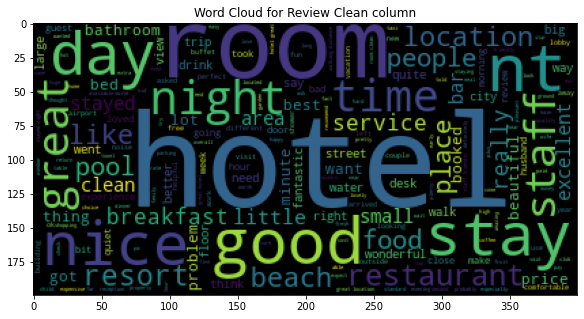

In [36]:
plt.figure(figsize=(15,5))
words=df1['Review_clean']
words1=' '.join(words)
word_cloud=WordCloud(stopwords=common_stopwords,background_color='black').generate(words1)
plt.imshow(word_cloud)
plt.title('Word Cloud for Review Clean column')
plt.show()

In [37]:
#From the above word cloud we can see that many of the words like hotel, day, night, room ,resort place , nice, breakfast are all the terms related to hotel
#Top words do not majorly show stopwords.

In [38]:
df1.head()

,Review,Rating,Review_clean
2271,great older hotel husband took parents visit s...,4,great older hotel husband took parent visit se...
18547,honeymoon paradise im going step step accurate...,5,honeymoon paradise im going step step accurate...
4214,cambridge good reviews trip advisor users dead...,5,cambridge good review trip advisor user dead h...
9566,"nice stay nice hotel good service, rooms ok. s...",4,nice stay nice hotel good service room ok show...
15612,vg agree good reports hotel.i stayed family su...,5,vg agree good report hoteli stayed family supe...


In [39]:
df2=df1.drop('Review',axis=1)
df2.head()

,Rating,Review_clean
2271,4,great older hotel husband took parent visit se...
18547,5,honeymoon paradise im going step step accurate...
4214,5,cambridge good review trip advisor user dead h...
9566,4,nice stay nice hotel good service room ok show...
15612,5,vg agree good report hoteli stayed family supe...


In [40]:
df2['Rating_label']=df2['Rating'].apply(lambda x: 'Positive' if x>3 else 'Neagtive')
df2.head()

,Rating,Review_clean,Rating_label
2271,4,great older hotel husband took parent visit se...,Positive
18547,5,honeymoon paradise im going step step accurate...,Positive
4214,5,cambridge good review trip advisor user dead h...,Positive
9566,4,nice stay nice hotel good service room ok show...,Positive
15612,5,vg agree good report hoteli stayed family supe...,Positive


In [41]:
df2['Rating_Enoder']=df2['Rating_label'].replace({'Positive':1,'Neagtive':0})

In [42]:
df2.head()

,Rating,Review_clean,Rating_label,Rating_Enoder
2271,4,great older hotel husband took parent visit se...,Positive,1
18547,5,honeymoon paradise im going step step accurate...,Positive,1
4214,5,cambridge good review trip advisor user dead h...,Positive,1
9566,4,nice stay nice hotel good service room ok show...,Positive,1
15612,5,vg agree good report hoteli stayed family supe...,Positive,1


In [43]:
#Model Building on Review column wether the given Review is positive or negative review

In [44]:
X1=df2['Review_clean']
Y=df2['Rating_Enoder']

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vectorizer = TfidfVectorizer(max_features=3000)
X=vectorizer.fit_transform(X1)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_tain,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.15, random_state=2,shuffle=False)

In [49]:
print(x_tain.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(425, 3000)
(75, 3000)
(425,)
(75,)


In [50]:
#1. Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(max_depth=5)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(x_tain,y_train)

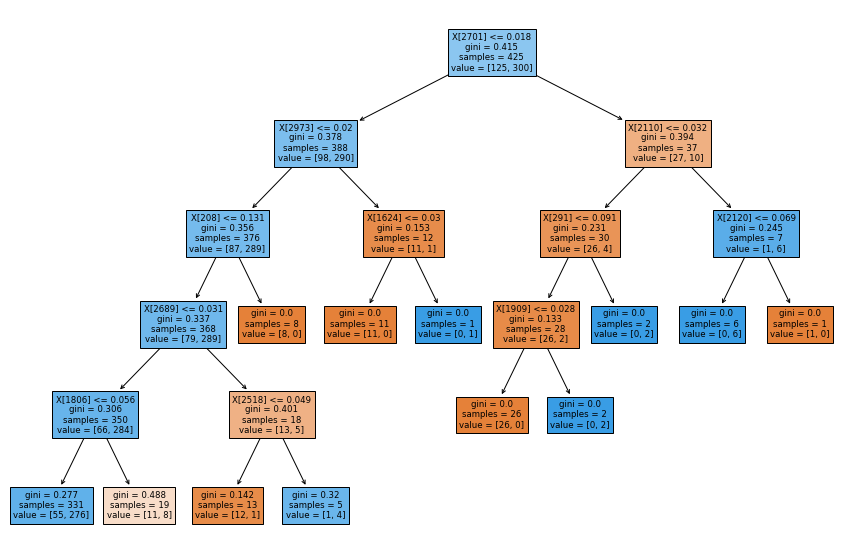

In [52]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)
plt.show()

In [53]:
# apply the model on unseen testing data
dt_preds = decision_tree_classification.predict(x_test)
from sklearn import metrics
print("Accuracy of Decision Tree Classifier:", metrics.accuracy_score(y_test, dt_preds))

Accuracy of Decision Tree Classifier: 0.68


In [54]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_dt = classification_report(y_test, dt_preds)
# print the performace measures
print(test_report_dt)

              precision    recall  f1-score   support

           0       0.31      0.21      0.25        19
           1       0.76      0.84      0.80        56

    accuracy                           0.68        75
   macro avg       0.53      0.52      0.52        75
weighted avg       0.64      0.68      0.66        75



In [55]:
#2. Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
Random_Forest_Classifier=RandomForestClassifier()
# fit the model using fit() on train data
Random_Forest = Random_Forest_Classifier.fit(x_tain,y_train)

In [58]:
# apply the model on unseen testing data
Rf_preds = Random_Forest_Classifier.predict(x_test)
from sklearn import metrics
print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test, Rf_preds))

Accuracy of Random Forest Classifier: 0.76


In [59]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_rf = classification_report(y_test, Rf_preds)
# print the performace measures
print(test_report_rf)

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.76      1.00      0.86        56

    accuracy                           0.76        75
   macro avg       0.88      0.53      0.48        75
weighted avg       0.82      0.76      0.67        75



In [60]:
#3. K Nearest Neighbour Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# define the K nearest neighbours model
KNeighbors_classifier = KNeighborsClassifier()

# train our K nearest neighbours model with the x and y training sets
KNeighbors=KNeighbors_classifier.fit(x_tain,y_train)

In [63]:
# apply the model on unseen testing data
kn_preds = KNeighbors.predict(x_test)
from sklearn import metrics
print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test, kn_preds))

Accuracy of KNeighbors Classifier: 0.7733333333333333


In [64]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_kn = classification_report(y_test, kn_preds)
# print the performace measures
print(test_report_kn)

              precision    recall  f1-score   support

           0       0.60      0.32      0.41        19
           1       0.80      0.93      0.86        56

    accuracy                           0.77        75
   macro avg       0.70      0.62      0.64        75
weighted avg       0.75      0.77      0.75        75



In [65]:
#4. AdaBoostClassifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
AdaBoost=ada_model.fit(x_tain,y_train)

In [68]:
# apply the model on unseen testing data
Ab_preds = AdaBoost.predict(x_test)
from sklearn import metrics
print("Accuracy of AdaBoost Classifier:", metrics.accuracy_score(y_test, Ab_preds))

Accuracy of AdaBoost Classifier: 0.8266666666666667


In [69]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_Ab = classification_report(y_test, Ab_preds)
# print the performace measures
print(test_report_Ab)

              precision    recall  f1-score   support

           0       0.80      0.42      0.55        19
           1       0.83      0.96      0.89        56

    accuracy                           0.83        75
   macro avg       0.82      0.69      0.72        75
weighted avg       0.82      0.83      0.81        75



In [70]:
#we have created 4 models:
#1.Decision Tree Classifier
#2.Random_Forest_Classifier
#3.KNeighborsClassifier
#4.AdaBoostClassifier

In [71]:
print("Accuracy of Decision Tree Classifier:", metrics.accuracy_score(y_test, dt_preds))
print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test, Rf_preds))
print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test, kn_preds))
print("Accuracy of AdaBoost Classifier:", metrics.accuracy_score(y_test, Ab_preds))

Accuracy of Decision Tree Classifier: 0.68
Accuracy of Random Forest Classifier: 0.76
Accuracy of KNeighbors Classifier: 0.7733333333333333
Accuracy of AdaBoost Classifier: 0.8266666666666667


In [72]:
#from the above we can see that AdaBoost Classifier has the good accuracy with respect to others

In [73]:
#To improve the model performance using LSTM

In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [75]:
df3=df2.copy()
df3.head()

,Rating,Review_clean,Rating_label,Rating_Enoder
2271,4,great older hotel husband took parent visit se...,Positive,1
18547,5,honeymoon paradise im going step step accurate...,Positive,1
4214,5,cambridge good review trip advisor user dead h...,Positive,1
9566,4,nice stay nice hotel good service room ok show...,Positive,1
15612,5,vg agree good report hoteli stayed family supe...,Positive,1


In [76]:
vocab_size=3500
tokenizer=Tokenizer(num_words=vocab_size,split=' ')
tokenizer.fit_on_texts(df3['Review_clean'].values)
#fit_on_texts :Updates internal vocabulary based on a list of texts. 
    #This method creates the vocabulary index based on word frequency. 
    #So if you give it something like, "The cat sat on the mat."
    #It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 
    #0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).

In [77]:
vocabsize=tokenizer.word_index#word_index
len(vocabsize)

7588

In [78]:
vocabsize

{'hotel': 1,
 'room': 2,
 'great': 3,
 'nt': 4,
 'good': 5,
 'staff': 6,
 'stay': 7,
 'night': 8,
 'nice': 9,
 'day': 10,
 'location': 11,
 'time': 12,
 'restaurant': 13,
 'stayed': 14,
 'service': 15,
 'place': 16,
 'beach': 17,
 'pool': 18,
 'like': 19,
 'clean': 20,
 'breakfast': 21,
 'resort': 22,
 'really': 23,
 'food': 24,
 'bed': 25,
 'people': 26,
 'area': 27,
 'bar': 28,
 'friendly': 29,
 'small': 30,
 'little': 31,
 'view': 32,
 'excellent': 33,
 'minute': 34,
 'helpful': 35,
 'got': 36,
 'walk': 37,
 'review': 38,
 'best': 39,
 'floor': 40,
 'want': 41,
 'bathroom': 42,
 'beautiful': 43,
 'water': 44,
 'thing': 45,
 'recommend': 46,
 'trip': 47,
 'desk': 48,
 'lot': 49,
 'problem': 50,
 'price': 51,
 'wonderful': 52,
 'make': 53,
 'booked': 54,
 'comfortable': 55,
 'quite': 56,
 'street': 57,
 'big': 58,
 'drink': 59,
 'right': 60,
 'better': 61,
 'way': 62,
 'went': 63,
 'city': 64,
 'morning': 65,
 'fantastic': 66,
 'say': 67,
 'need': 68,
 'think': 69,
 'buffet': 70,
 'we

In [79]:
X=tokenizer.texts_to_sequences(df3['Review_clean'].values)
X
#texts_to_sequences: Transforms each text in texts to a sequence of integers. 
    #So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. 
    #Nothing more, nothing less, certainly no magic involved.

[[3,
  978,
  1,
  92,
  99,
  898,
  126,
  416,
  115,
  10,
  16,
  9,
  4,
  107,
  19,
  119,
  3,
  164,
  11,
  80,
  190,
  142,
  436,
  1398,
  1225,
  240,
  417,
  453,
  978,
  127,
  2438,
  1399,
  103,
  1610,
  979,
  304,
  2,
  554,
  899,
  20,
  25,
  716,
  6,
  48,
  4,
  35,
  377,
  822,
  74,
  3389,
  1400,
  96,
  3390,
  103,
  316,
  2,
  717,
  1611,
  62,
  2,
  213,
  103,
  3391,
  274,
  2439,
  191,
  184,
  1918,
  3392,
  621,
  2440,
  64,
  275,
  5,
  622,
  13,
  555,
  30,
  1919,
  718,
  898,
  2,
  58,
  305,
  7,
  87],
 [306,
  764,
  1612,
  81,
  378,
  378,
  2441,
  32,
  1920,
  143,
  379,
  1613,
  1612,
  980,
  178,
  3393,
  1083,
  178,
  981,
  185,
  2442,
  165,
  38,
  81,
  982,
  67,
  1401,
  454,
  62,
  380,
  1614,
  379,
  67,
  3394,
  47,
  53,
  2443,
  2444,
  179,
  3395,
  2444,
  764,
  3396,
  100,
  19,
  2445,
  3397,
  1226,
  209,
  202,
  143,
  587,
  900,
  31,
  983,
  984,
  1921,
  2446,
  2447,
  2

In [80]:
X=pad_sequences(X)#pad_sequences is used to ensure that all sequences in a list have the same length.

In [81]:
#Examples of padding

In [82]:
X[1].shape#shape of the first text

(404,)

In [83]:
df3['Review_clean'].values[1]#value of the first text

'honeymoon paradise im going step step accurate view hesitant come let explain im picky hard tempermental stomach hard reach standard researched read review going allow say exceeded expectation way met dissapointed let say complainer trip make youre cranky home youll cranky paradise toothe airport like giant tiki hut open air come stair straight little band playing baggage immediate belt custom pay  piece enter country issue easythe drive hotel eye opening true look rd world country jarring appreciate understand culture custom hard work little bumpy ride car sick bring dramamine head hotel gorgeous manicured direction attention paramount complaint cleanliness beauty resort native plant palm awesome pool stretch forever ft way chair hard come palm hut reserve chair morning w towel didnt issue wasnt crowded beach pristine water warm let say came tan room immediately upgraded th floor colonial presidential  awesome  mini bar big jacuzzi bath tub work honeymoon banner door cute champagne w

In [84]:
X[1]#pad_sequences of the first text

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  306,  764, 1612,   81,  378,  378,
       2441,   32, 1920,  143,  379, 1613, 1612,  980,  178, 3393, 1083,
        178,  981,  185, 2442,  165,   38,   81,  982,   67, 1401,  454,
         62,  380, 1614,  379,   67, 3394,   47,   53, 2443, 2444,  179,
       3395, 2444,  764, 3396,  100,   19, 2445, 3397, 1226,  209,  202,
        143,  587,  900,   31,  983,  984, 1921, 2446, 2447, 2448,  166,
       1227, 1228,  358,  276, 3398,  719,    1, 1229, 1402,  588,  107,
        823,  298,  358, 3399, 1403,  589, 1084, 2448,  178,  111,   31,
       1230,  299,  241,  381,  277, 3400,  418,    1,  382, 3401,  482,
        623, 3402,  258,  901, 2449,   22, 1404, 3403,  985,  455,   18,
       1922, 2450, 1923,   62,  167,  178,  143,  985, 1226, 1085,  167,
         65, 1405,  180,  456,  276,  824,  590,   

In [85]:
X.shape#overall shape of x

(500, 404)

In [86]:
X.shape[1]

404

In [87]:
#More explanation of .fit_on_texts and .texts_to_sequences on belwo link

#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do

In [88]:
#MODEL building usig LSTM

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [112]:
embed_dim = 128
lstm_out = 196

model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=X.shape[1]))
#vocabSize:input_dim (Integer. Size of the vocabulary, i.e. maximum integer index + 1.)
#embed_dim:output_dim (Integer. Dimension of the dense embedding.)
#input_length: Length of input sequences
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out,dropout=0.2,recurrent_dropout=0.2))
#lstm_out : Positive integer, dimensionality of the output space.
model.add(Dense(2,activation='sigmoid'))

In [113]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [114]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 404, 128)          448000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 404, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 394       
Total params: 703,194
Trainable params: 703,194
Non-trainable params: 0
_________________________________________________________________


In [115]:
#What is SpatialDropout1D?

In [116]:
#Dropout(): Let's define 2D input: [[1, 1, 1], [2, 2, 2]]. 
            #Dropout will consider every element independently, and may result in something like [[1, 0, 1], [0, 2, 2]]
    
#SpatialDropout1D(): In this case result will look like [[1, 0, 1], [2, 0, 2]]. 
                    #Notice that 2nd element was zeroed along all channels.

In [117]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(df3['Rating_label']).values
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train3.shape,Y_train3.shape)
print(X_test3.shape,Y_test3.shape)

(425, 404) (425, 2)
(75, 404) (75, 2)


In [118]:
batch_size = 15
model.fit(X_train3, Y_train3, epochs = 5, batch_size=batch_size, verbose = 1)

Epoch 1/5
29/29 [==============================] - 108s 3s/step - loss: 0.6305 - accuracy: 0.6988
Epoch 2/5
29/29 [==============================] - 103s 4s/step - loss: 0.5957 - accuracy: 0.7035
Epoch 3/5
29/29 [==============================] - 111s 4s/step - loss: 0.4477 - accuracy: 0.7741
Epoch 4/5
29/29 [==============================] - 112s 4s/step - loss: 0.3342 - accuracy: 0.9129
Epoch 5/5
29/29 [==============================] - 108s 4s/step - loss: 0.1646 - accuracy: 0.9624


In [119]:
score,acc = model.evaluate(X_test3, Y_test3, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

5/5 [==============================] - 4s 576ms/step - loss: 0.5165 - accuracy: 0.7867
score: 0.52
accuracy: 0.79


In [ ]:
#-----------------------------------END-----------------------------------------------------------------#